# Большое практическое задание 1
# Классификация изображений цифр метрическими методами

## курс "Машинное обучение 1", программа OzonMasters, 2021

## Студент: Арешин Станислав Олегович

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

from knn.distances import euclidean_distance, cosine_distance 
from knn.classification import BatchedKNNClassifier
from knn.model_selection import knn_cross_val_score

%matplotlib inline

### 1. Загрузка даннных

Эксперименты этого задания необходимо проводить на датасете MNIST. Загрузить датасет можно при помощи функции `sklearn.datasets.fetch_openml("mnist_784")` или скачать вручную с сайта
http://yann.lecun.com/exdb/mnist/. Датасет необходимо разбить на обучающую выборку (первые 60 тыс.
объектов) и тестовую выборку (10 тыс. последних объектов).

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
df = pd.DataFrame(mnist.data)
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
target = pd.DataFrame(mnist.target)
target.head()

,class
0,5
1,0
2,4
3,1
4,9


In [5]:
X = np.array(df)
y = np.array(target, dtype = 'int64').reshape(-1)
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [6]:
X_train.shape, y_train.shape 

((60000, 784), (60000,))

In [7]:
X_test.shape, y_test.shape 

((10000, 784), (10000,))

### 2. Исследование скорости методов поиска (4 балла)

Измерьте для каждого алгоритма поиска (`kd_tree`, `ball_tree`, `brute` и `my_own`) время нахождения 5 ближайших соседей для каждого объекта тестовой выборки по евклидовой метрике. Выберите подмножество признаков, по которому будет считаться расстояние, размера 10, 20, 100 (подмножество признаков выбирается один раз для всех объектов, случайно).

In [8]:
from time import time
from tqdm import tqdm
from collections import defaultdict


n_neighbors = 5
subsets_grid = [10, 20, 100]
algs_grid = ['kd_tree', 'ball_tree', 'brute', 'my_own']

execution_time = defaultdict(dict)

for subset in tqdm(subsets_grid):
    ind = np.random.choice(np.arange(X.shape[1]), subset, replace=False)
    for alg in algs_grid:
        model = BatchedKNNClassifier(n_neighbors,
                algorithm= alg,
                metric='euclidean',
                weights='uniform',
                batch_size=2000)
        model.fit(X_train[:, ind], y_train)
        start = time()
        model.kneighbors(X_test[:, ind])
        end = time()
        execution_time[subset][alg] = end - start
    
execution_time

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:47<00:00, 95.88s/it]


defaultdict(dict,
            {10: {'kd_tree': 0.44866323471069336,
              'ball_tree': 3.5664305686950684,
              'brute': 8.904346227645874,
              'my_own': 11.737062692642212},
             20: {'kd_tree': 2.805263042449951,
              'ball_tree': 20.10458755493164,
              'brute': 9.14287257194519,
              'my_own': 11.836034059524536},
             100: {'kd_tree': 85.7719132900238,
              'ball_tree': 104.96225905418396,
              'brute': 10.470634460449219,
              'my_own': 13.247933864593506}})

#### Графики результатов эксперимента

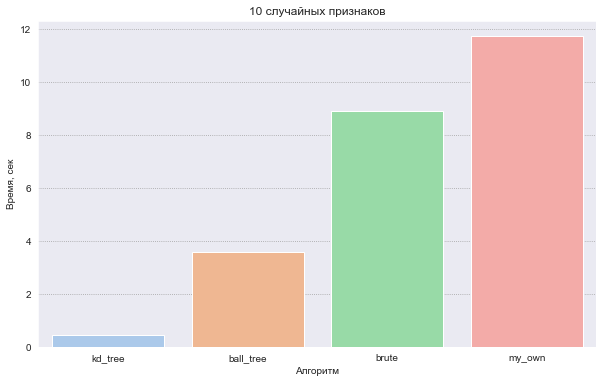

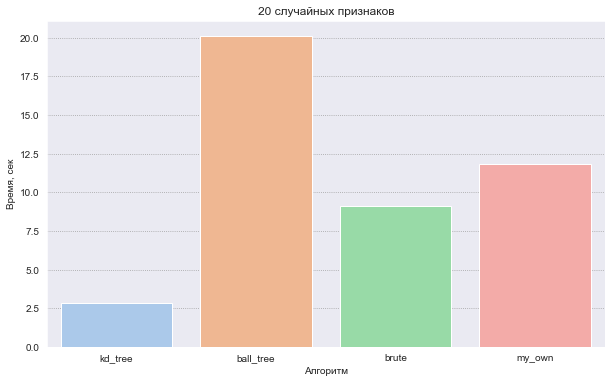

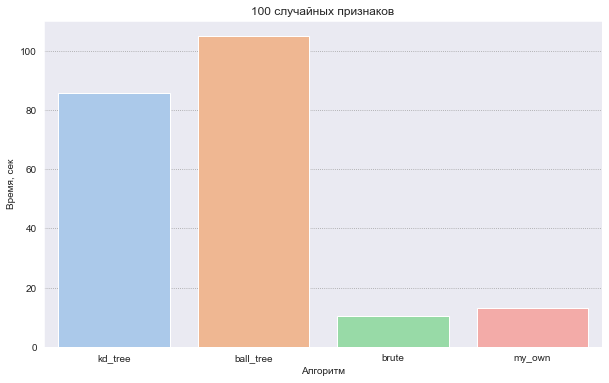

In [9]:
plt.figure(figsize = (10,6))
plt.title('10 случайных признаков')
sns.barplot(x = list(execution_time[10].keys()), y = list(execution_time[10].values()), palette = 'pastel')
plt.xlabel('Алгоритм')
plt.ylabel('Время, сек')
plt.show()

plt.figure(figsize = (10,6))
plt.title('20 случайных признаков')
sns.barplot(x = list(execution_time[20].keys()), y = list(execution_time[20].values()), palette = 'pastel')
plt.xlabel('Алгоритм')
plt.ylabel('Время, сек')
plt.show()

plt.figure(figsize = (10,6))
plt.title('100 случайных признаков')
sns.barplot(x = list(execution_time[100].keys()), y = list(execution_time[100].values()), palette = 'pastel')
plt.xlabel('Алгоритм')
plt.ylabel('Время, сек')
plt.show()

#### Ответьте на следующие вопросы Поменять под новые графики

**1. Какой алгоритм сработал быстрее всего для каждого из размера подвыборок? Ожидали ли вы такие результаты до проведения эксперимента?**

Для размера признакового пространства $D = 10$ однозначно лучшим по затраченному времени стал алгоритм KD-tree, затем Ball-Tree, затем соответственно алгоритм полного перебора brute и реализованный алгоритм.
   
Для размера признакового пространства $D = 20$ лучшим с отрывом вновь стал алгоритм KD-tree. Но далее картина поменялась: Ball-Tree отработал хуже всех, на втором месте brute, на третьем реализованный алгоритм.
   
Для размера признакового пространства $D = 100$ древовидные алгоритмы стали работать гораздо медленнее brute и реализованного. Лучшим стал brute, затем реализованный. Значительно дольше работали KD-tree и Ball-Tree.
   
Для датасета MNIST размер признакового пространства $D = 784$. На графиках видна зависимость роста времени работы KD-tree и Ball-Tree в зависимости от размера признакового пространства, соответственно, более показательным для выбора алгоритма будет результат, изображенный на третьем графике ($D = 100$).
   
Рост времени работы древовидных алгоритмов был ожидаем, так как древовидные алгоритмы обычно не очень хорошо работают с большим пространством признаков. Поэтому было ожидаемо, что для большой размерности brute  и реализованный алгоритм сработают быстрее. А вот то, что эти два алгоритма будут искать ближайшего соседа примерно за одно время во всех случаях, для меня было удивлением.

**2. Приведите теоретическую сложность каждого из алгоритмов поиска. Согласуется ли время работы алгоритмов на практике с их теоретической вычислительной сложностью? Как вы думаете, почему?**

Для ответа на этот вопрос я решил заглянуть в документацию sklearn. В документации сказано, что brute (полный перебор) - самая наивная реализация Если размерность датасета $N$, размерность признакового пространства $D$, то сложность поиска ближайшего соседа $O(DN^2)$. Это делает его эффективным при малых $N$, при больших $N$ работает очень медленно.

Сложность поиска ближайшего соседа для алгоритма KD-Tree: $O(DN\log{N})$, что значительно лучше, чем brute и достигается путём сокращения кол-ва вычислений расстояний. После построения дерева ближайший сосед определяется за $O(\log{N})$ Предполагаю, что сложность Ball-Tree тоже $O(DN\log{N})$.

Идея реализованного алгоритма тоже полный перебор, соответственно, сложность такая же, как у brute: $O(DN^2)$

Также в документации сказано, что при возрастании $D$ $(D > 20)$ сложность алгоритма KD-Tree стремится к $O(DN^2)$, что уже сопоставимо с brute и реализованным. Прибавим к этому затраты времени на запросы к довольно сложному в большом признаковом пространстве дереву и то, что деревьям нужно проверять соседние области для точного поиска ближайшего соседа, если объект находится на границе разделения, а это дополнительные запросы. Получается, что при больших $D$ KD-Tree работает дольше алгоритмов полного перебора.

Отметим, что алгоритм Ball-Tree направлен на то, чтобы убрать недостаток KD-Tree при возрастании размерности пространства признаков. Но его время работы всё равно дольше brute и реализованного (по той же причине).

Сопоставим теоретическую сложность и результаты эксперимента. Результаты KD-Tree сходятся: при маленькой размерности $D$ и большой выборке $N$ он гораздо быстрее полного перебора и Ball-Tree, при больших $D$ становится очень медленным. А вот результаты Ball-Tree не сопоставляются. В моём эксперименте даже при большом $D$ он медленнее KD-Tree. Предполагаю, что это связано со сложностью запросов к дереву и иногда необходимости дополнительных запросов для точного поиска соседей. Что касается алгоритма brute и реализованного, они как и в теории хорошо работают для большого пространства признаков $D$ и медленнее KD-Tree и Ball-Tree при маленьком из-за большого $N$. Почему при $D = 20$ Ball-Tree уже медленнее brute и реализованного немного непонятно, возможно также из-за сложности построения дерева

Почему brute работает лучше реализованного? Идея методов одинакова - мы вычисляем матрицу попарных расстояний. Здесь дело скорее всего в реализации. Brute использует интерфейс sklearn.metrics.pairwise, который может быть оптимальные реализованных метрик, хотя разница по времени работы не велика.

**3. Какой алгоритм исходя из результатов эксперимента следует использовать в дальнейшем? Выберите алгоритм поиска соседей, который вы будете использовать во всех экспериментах ниже.**

Для дальнейших экспериментов я буду использовать алгоритм brute. Он самый быстрый по затраченному на поиск ближайшего соседа времени при возрастании размерности пространства, а в случае датасета MNIST, как упоминалось выше, размер признакового пространства $D = 784$. Если для $D = 100$ он значительно превосходит KD-tree и Ball-tree, то для $D = 784$ разница будет ещё более весомой. Что касается реализованного алгоритма, он гораздо быстрее KD-tree и Ball-tree для пространств большой размерности, но, к сожалению, не сильно, но всегда проигрывает алгоритму brute.

### 3. Исследование зависимости точности алгоритма на кросс-валидации (4 балла)


Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) алгоритма k ближайших соседей в зависимости от следующих факторов:
* количество соседей k от 1 до 10
* используется евклидова или косинусная метрика

In [10]:
k_grid = np.arange(1, 11) 
k_grid

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [11]:
cv_results_euclid = knn_cross_val_score(X_train, y_train, k_grid,
                                        'accuracy', cv=3, algorithm='brute',
                                        metric='euclidean', weights='uniform', batch_size=2000)

cv_results_euclid

defaultdict(<function knn.model_selection.knn_cross_val_score.<locals>.<lambda>()>,
            {1: array([0.96895, 0.96675, 0.9667 ]),
             2: array([0.9603 , 0.95995, 0.96125]),
             3: array([0.96955, 0.96825, 0.96715]),
             4: array([0.96705, 0.9667 , 0.9671 ]),
             5: array([0.9681, 0.9673, 0.9672]),
             6: array([0.96555, 0.96495, 0.9657 ]),
             7: array([0.9652, 0.965 , 0.9656]),
             8: array([0.96415, 0.9639 , 0.96525]),
             9: array([0.9637 , 0.9632 , 0.96455]),
             10: array([0.96245, 0.9622 , 0.9637 ])})

In [12]:
cv_accuracy_euclid = {key: np.mean(cv_results_euclid[key]) for key in cv_results_euclid.keys()}
cv_accuracy_euclid

{1: 0.9674666666666667,
 2: 0.9605,
 3: 0.9683166666666668,
 4: 0.9669499999999999,
 5: 0.9675333333333334,
 6: 0.9653999999999999,
 7: 0.9652666666666666,
 8: 0.9644333333333334,
 9: 0.9638166666666667,
 10: 0.9627833333333333}

In [13]:
cv_results_cosine = knn_cross_val_score(X_train, y_train, k_grid,
                                        'accuracy', cv=3, algorithm='brute',
                                        metric='cosine', weights='uniform', batch_size=2000)

cv_results_cosine

defaultdict(<function knn.model_selection.knn_cross_val_score.<locals>.<lambda>()>,
            {1: array([0.9733 , 0.9708 , 0.97045]),
             2: array([0.96895, 0.9664 , 0.96775]),
             3: array([0.97365, 0.97155, 0.9709 ]),
             4: array([0.9725 , 0.97095, 0.9722 ]),
             5: array([0.97275, 0.97015, 0.9716 ]),
             6: array([0.97195, 0.9697 , 0.97215]),
             7: array([0.97125, 0.96815, 0.97075]),
             8: array([0.97125, 0.96835, 0.97155]),
             9: array([0.97005, 0.967  , 0.9707 ]),
             10: array([0.96935, 0.96615, 0.9707 ])})

In [14]:
cv_accuracy_cosine = {key: np.mean(cv_results_cosine[key]) for key in cv_results_cosine.keys()}
cv_accuracy_cosine

{1: 0.9715166666666667,
 2: 0.9677000000000001,
 3: 0.9720333333333334,
 4: 0.9718833333333333,
 5: 0.9714999999999999,
 6: 0.9712666666666667,
 7: 0.97005,
 8: 0.9703833333333334,
 9: 0.9692500000000001,
 10: 0.9687333333333333}

#### Нарисуйте график зависимости точности от количества соседей по каждой метрике

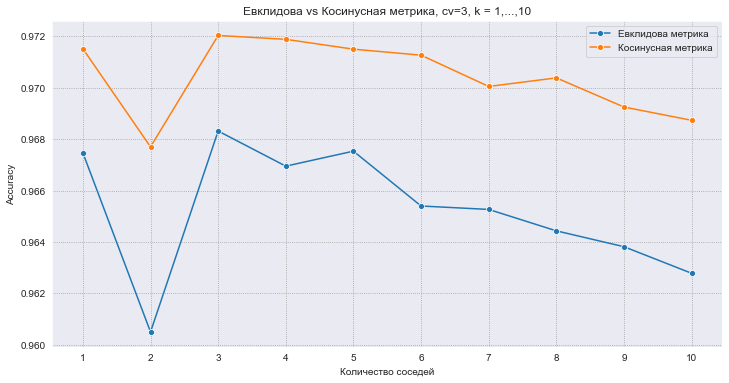

In [15]:
plt.figure(figsize = (12,6))
plt.title('Евклидова vs Косинусная метрика, cv=3, k = 1,...,10')
sns.lineplot(x = list(cv_accuracy_euclid.keys()), y = list(cv_accuracy_euclid.values()), marker = 'o')
sns.lineplot(x = list(cv_accuracy_cosine.keys()), y = list(cv_accuracy_cosine.values()), marker = 'o')
plt.xticks(k_grid)
plt.legend(['Евклидова метрика', 'Косинусная метрика'])
plt.xlabel('Количество соседей')
plt.ylabel('Accuracy')
plt.show()

#### Ответьте на следующие вопросы

**1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор (например, если у вас несколько наборов параметров с высоким качеством, обоснуйте как вы выберите среди этих наборов один).**

В данном эксперименте пик accuracy при использовании обеих метрик при $k = 3$, все остальные значения k проигрывают по метрике accuracy, соответственно, логично выбрать $k = 3$ как оптимальный параметр для не взвешенного алгоритма. Также, так как $k$ небольшое, матрица расстояний будет вычисляться быстро.  Кроме того, лучшее качество показывает алгоритм с косинусной метрикой. Таким образом логично выбрать $k = 3$ и $metric='cosine'$ как оптимальные гиперпараметры не взвешенного алгоритма.

**2. Какая метрика лучше себя показала в экспериментах? Можете ли вы объяснить, почему?**

При любом количестве соседей $k$ алгоритм с косинусной метрикой отрабатывает с большей долей правильных ответов классификатора, чем алгоритм с евклидовой метрикой. Попробую объяснить, почему так происходит. Для евклидовой метрики важен каждый признак и из-за большой размерности пространства $D = 784$ алгоритм с этой метрикой подвержен "проклятию размерности". Косинусная метрика в свою очередь часто используется для разреженных данных, например, в датасете MNIST значение большинства признаков равно 0. Они по идее не несут полезной информации (возможно несут только на границе цифры, чтобы понимать, где переход). Косинусная метрика вычисляет вклад ненулевых признаков и в итоге алгоритм менее подвержен "проклятию размерности размерности" чем при евклидовой метрике.

**3. Есть ли на графике зависимости точности от количество соседей "выбросы", резкие падения/повышения качества для одного значения k по сравнению с соседними? Если да, предположите причину появления этих выбросов.**

Самое значительное падение качества классификации при соседних $k$ зафиксировано при $k: 1 \rightarrow 2$. Затем при $k: 5 \rightarrow 6$ и $k: 3 \rightarrow 4$. Эти падения связаны с четностью и не четностью выбранного $k$, для не взвешенного алгоритма нехорошо выбрать четное $k$, так как может получиться ситуация, когда поровну соседей разных классов, что может привести к ошибке классификации. В целом, отметим, что при $k > 3$ качество не взвешенного алгоритма постепенно падает. Это может быть связано с тем, что классов много и при увеличении $k$ алгоритм начинает захватывать новые ближайшие объекты других классов и может принимать ошибочное решение в их пользу. (Например при $k = 3$ рядом с объектом $8$ будет $8, 8, 9$ - ответ $8$, а при $k = 7$ рядом будет $8, 8, 9, 9, 3, 3, 3$ и ответ станет $3$, то есть ошибка классификации).

### 3. Исследование зависимости точности взвешенного алгоритма на кросс-валидации (4 балла)

По результатам предыдущего эксперимента выберите метрику, которую вы будете использовать в этом эксперименте.

Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) взвешенного алгоритма k ближайших соседей в зависимости от количество соседей k (от 1 до 10).

Голос объекта положите равным `1 / (distance + eps)`, где `eps` = `1e-5`.

In [16]:
k_grid = np.arange(1, 11) 
k_grid

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [18]:
cv_results_cosine_w = knn_cross_val_score(X_train, y_train, k_grid,
                                        'accuracy', cv=3, algorithm='brute',
                                        metric='cosine', weights='distance', batch_size=2000)

cv_accuracy_cosine_w = {key: np.mean(cv_results_cosine_w[key]) for key in cv_results_cosine_w.keys()}
cv_accuracy_cosine_w

{1: 0.9715166666666667,
 2: 0.9715166666666667,
 3: 0.9730666666666666,
 4: 0.9741,
 5: 0.9726499999999999,
 6: 0.9730333333333334,
 7: 0.9712833333333334,
 8: 0.9718666666666667,
 9: 0.9705833333333334,
 10: 0.9704666666666667}

#### Нарисуйте график зависимости точности от количества соседей 

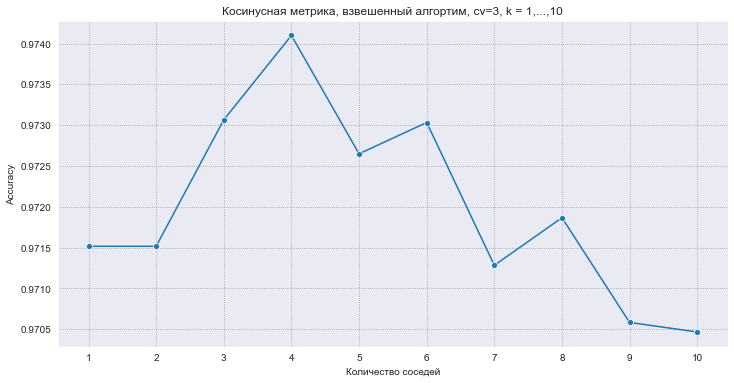

In [19]:
plt.figure(figsize = (12,6))
plt.title('Косинусная метрика, взвешенный алгортим, cv=3, k = 1,...,10')
sns.lineplot(x = list(cv_accuracy_cosine_w.keys()), y = list(cv_accuracy_cosine_w.values()), marker = 'o')
plt.xticks(k_grid)
plt.xlabel('Количество соседей')
plt.ylabel('Accuracy')
plt.show()

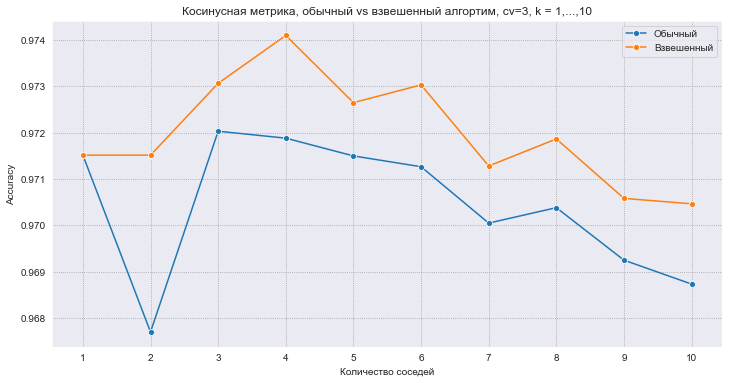

In [20]:
plt.figure(figsize = (12,6))
plt.title('Косинусная метрика, обычный vs взвешенный алгортим, cv=3, k = 1,...,10')
sns.lineplot(x = list(cv_accuracy_cosine.keys()), y = list(cv_accuracy_cosine.values()), marker = 'o')
sns.lineplot(x = list(cv_accuracy_cosine_w.keys()), y = list(cv_accuracy_cosine_w.values()), marker = 'o')
plt.xticks(k_grid)
plt.legend(['Обычный', 'Взвешенный'])
plt.xlabel('Количество соседей')
plt.ylabel('Accuracy')
plt.show()

#### Ответьте на следующие вопросы

**1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор.**

Лучший результат по метрике accuracy ($accuracy = 0.9741$) у взвешенного алгоритма с косинусной метрикой при $k = 4$. Данное качество превосходит предыдущее качество $accuracy = 0.972$ для невзвешенного алгоритма с косинусной метрикой. Так как мы хотим получить наиболее точный алгоритм классификации, логично взять эти гиперпараметры в качестве оптимальных, то есть $k=4$,  $metric='cosine'$, $weights='distance'$.

**2. Сравните результаты взвешенного алгоритма с невзвешенным. Объясните разницу/отсутствие разницы в результатах.**


При любом $k > 1$ взвешенный алгоритм превосходит по качеству невзвешенный. Кроме того, заметно, что при четных $k$ больше нет падения accuracy, наоборот лучший результат при четном $k = 4$. Это связано с тем, что, используя взвешенный алгоритм, мы присваиваем большие веса ближайшим соседям при голосовании и в результате алгоритм не совершает ошибки в ситуации, когда поровну соседей разных классов. Также веса помогают более точно предсказывать классы в стандартных ситуациях при нечетных $k$.

### 4. Применение алгоритма и интерпретация ошибок (3 балла)

**1. Примените лучший алгоритм к исходной обучающей и тестовой выборке и посчитайте точность классификации. Сравните с точностью по кросс-валидации. Опишите ваши результаты.**

In [21]:
model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9752

Точность классификации примерно сравнима с точностью, полученной на кросс валидации, и даже её превосходит (на кросс валидации $accuracy = 0.9741$, на тестовой выборке $accuracy = 0.9752$). Это связано с тем, что на кросс-валидации на каждом фолде при обучении используется 2/3 обучающей выборки, а в данном случае используется вся обучающая выборка, что позволяет модели лучше обучиться и показать лучший скор. Приблизительное равенство качества на тесте и на кросс-валидации говорит об отсутствии переобучения модели и о том, что тестовая выборка имеет примерно такое же распределение данных, что и обучающая.

Также с помощью sklearn.metrics.classification_report были вычислены другие метрики качества алгоритма. Отметим, что все метрики достаточно высоки, f1 мера в диапазоне от 0.96 до 0.99 говорит о хорошем балансе precision и recall для всех классов. Лучше всех алгоритм предсказывает класс 1 (f1 = 0.99), хуже всех класс 9 (f1 = 0.96).

2. Постройте и проанализируйте матрицу ошибок (confusion matrix), используйте функцию `sklearn.metrics.confusion_matrix`. Визуализируйте несколько объектов из тестовой выборки, на которых были допущены ошибки. Проанализируйте и укажите их общие черты.

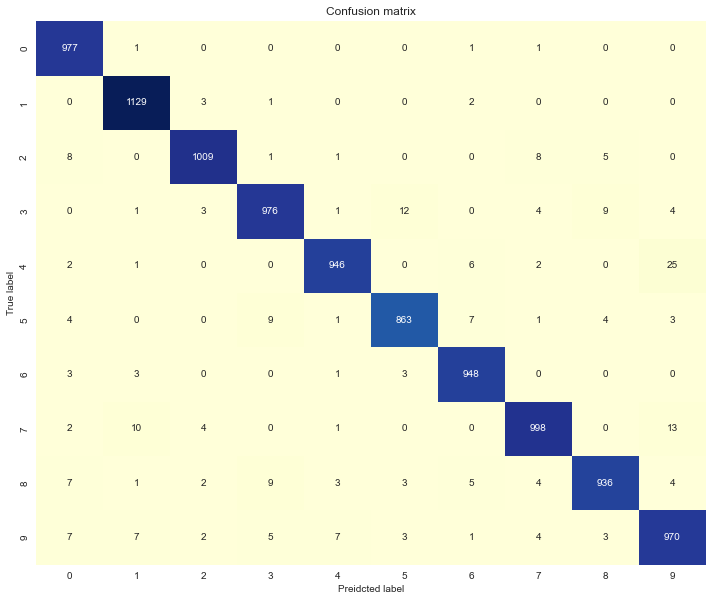

In [24]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,10))
plt.title('Confusion matrix')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap="YlGnBu", fmt= '', cbar = False)
plt.ylabel('True label')
plt.xlabel('Preidcted label')
plt.show()

По результатам матрицы ошибок визуально видно, что Класс 0 определяется лучше всех и действительно, recall класса 0 равен 1, то есть практически все объекты, принадлежащие этому классу алгоритм относит к этому классу. Но в то же время по матрице видно, что алгоритм частно относит другие объекты к классу 0, о чем свидетельствует второй снизу precision = 0.96.

Также видно, что класс 9 часто путается с другими классами, и при этом другие классы часто относятся к классу 9, поэтому у класса 9 самый низкий recall = 0.96 и самый низкий  precision = 0.95.

Видна проблема, когда алгоритм путает конкретные классы. Например, наиболее заметно, что часто класс 4 относится к классу 9 (25 раз), класс 3 относится к классу 5 (12 раз), класс 7 часто относится к классу 1 и классу 9 (10 и 13 раз), класс 8 относится к классу 3 и 1 (9 и 7 раз), а класс 9 вообще алгоритм любит относить к другим классам.

Предположительно, такие ошибки алгоритма по большей части связаны с похожим написанием цифр, когда алгоритму тяжело понять 4 это или 9, 7 это или 1 и тд, потому что при письменном написании этих цифр их действительно можно перепутать. Построим несколько визуализаций, чтобы проверить эту гипотезу.

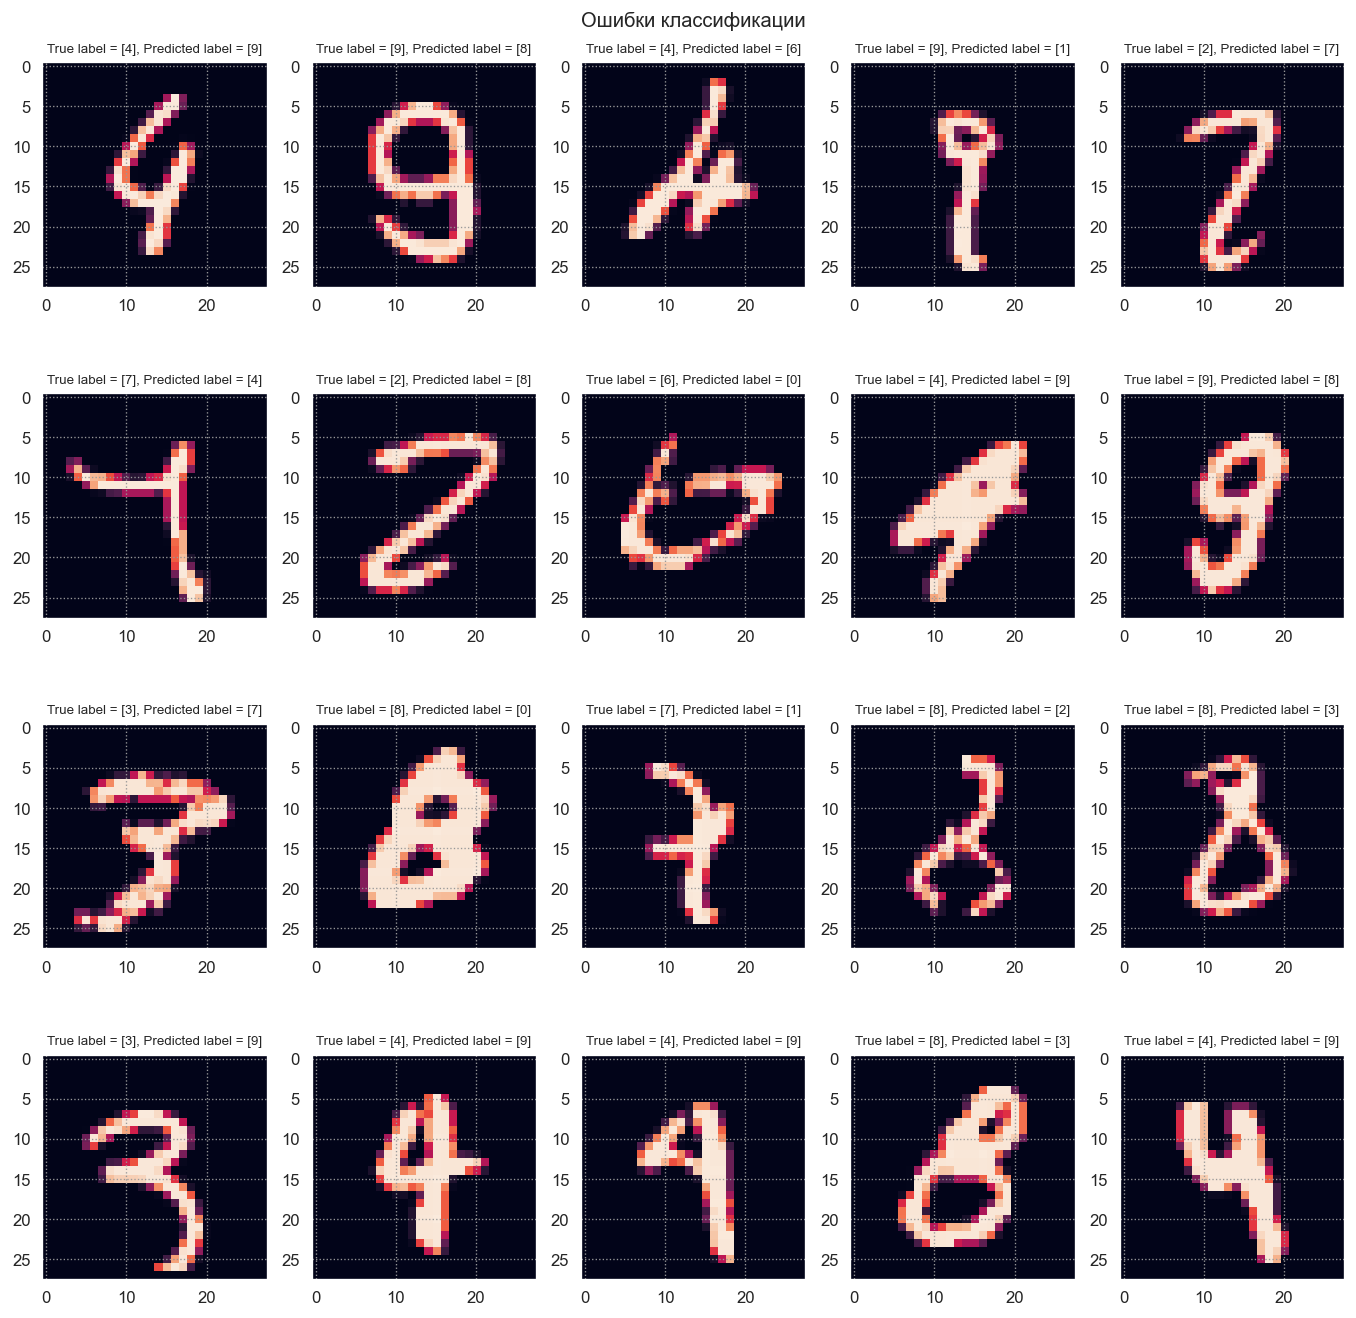

In [25]:
errors_inds = np.argwhere(y_test != y_pred)


fig = plt.figure(figsize=(14, 14))
fig.set_dpi(120)
plt.title('Ошибки классификации')
plt.axis('off')

for i, ind in enumerate(errors_inds):
    x, true_label, pred_label = X_test[ind], y_test[ind], y_pred[ind]
    
    ax = fig.add_subplot(4, 5, i + 1)
    ax.set_title(f'True label = {true_label}, Predicted label = {pred_label}', fontsize=8)
    ax.imshow(x.reshape(28, 28))
    if i == 19:
        break
        
plt.show()

На данных визуализациях как раз очень часто попадается класс 4, который определяется к классу 9 (на 1, 2 и 4 строках). У такого написания 4 действительно много схожего с написанием 9, из-за этого алгоритм ошибается. 

Встречаются рисунки, где абсолютно непонятно, что это за цифра, например 1 строка 3,4 рисунки, 4 строка 4 рисунок. В таких случаях по общим чертам алгоритм пытается отнести к какому-либо классу, но не угадывает.

Встречаются рисунки, где например даже я бы ответил так же, как алгоритм, если бы мне показали эту цифру, например 2 строка 1 рисунок это же больше похоже на 7, 2 строка 3 рисунок явно 0, а не 6 :)


Ну и в остальных случаях все зависит от написания цифры, иногда она больше похожа на какую-нибудь другую, чем на свою метку, о чём и пытается сказать нам алгоритм классификации.

## Бонус 1. Размножение обучающей выборки (3 балла)

Размножьте обучающую выборку с помощью поворотов, смещений, применений гауссовского фильтра и морфологических операций. Разрешается использовать библиотеки для работы с изображениями. Подобрать по кросс-валидации с 3 фолдами параметры преобразований. Рассмотреть следующие параметры для преобразований и их комбинации:
1. Величина поворота: 5, 10, 15 (в каждую из двух сторон)
2. Величина смещения: 1, 2, 3 пикселя (по каждой из двух размерностей)
3. Дисперсия фильтра Гаусса: 0.5, 1, 1.5
4. Морфологические операции: эрозия, дилатация, открытие, закрытие с ядром 2

Проанализируйте, как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

**Замечание.** Не обязательно хранить все обучающие выборки в процессе эксперимента. Достаточно вычислить ближайших соседей по каждой из выборок, а затем выбрать из них ближайших соседей.

**Замечание по дизайну эксперимента**. В этой части вам предлагается самим выбрать дизайн эксперимента. Перебор всевоможных комбинаций преобразований может быть затруднительным, в то время как жадный выбор преобразований уже даст улучшение в качестве.

In [9]:
from tqdm import tqdm
import scipy.ndimage as ndimage
from skimage import transform
from cv2 import GaussianBlur, erode, dilate, morphologyEx, MORPH_OPEN, MORPH_CLOSE
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [10]:
def concat_data(X_train, y_train, X_augment, y_augment = None):
    if y_augment is None:
        y_augment = y_train
    X_train_new = np.concatenate((X_train, X_augment), axis = 0)
    y_train_new = np.concatenate((y_train, y_augment))
    # перемешаем агументированные данные и исходные
    random_ind = np.random.permutation(X_train_new.shape[0])
    X_train_new = X_train_new[random_ind]
    y_train_new = y_train_new[random_ind]
    return X_train_new, y_train_new

In [11]:
def custom_cross_val_score(model, X_train, y_train, X_augment, y_augment, cv = 3):
    score = []
    kf = KFold(n_splits=cv)
    for train, augment in zip(kf.split(X_train), kf.split(X_augment)):
        
        train_index, test_index = train
        augment_index, _ = augment
        
        train_set, y_train_set = X_train[train_index], y_train[train_index]
        augment_set, y_augment_set = X_augment[augment_index], y_augment[augment_index]
        test_set, y_test_set = X_train[test_index], y_train[test_index]
        
        train_set = np.concatenate((train_set, augment_set), axis = 0)
        y_train_set = np.concatenate((y_train_set, y_augment_set), axis = 0)
        
        clf = model
        clf.fit(train_set, y_train_set)
        y_pred = clf.predict(test_set)
        score.append(accuracy_score(y_test_set, y_pred))
        
    return np.mean(score)

Извиняюсь за код, не хватило времени, чтобы хорошо все оформить в отдельные функции.

Из важного, при переборе параметров я рандомно выделяю 1/3 обучающей выборки для аугментации. Этого достаточно, чтобы увидеть изменение качества и выбрать лучший параметр, а также экономит много времени.

Реализовал функцию custom_cross_val_score для выполнения кросс валидации так, чтобы аугментированные данные не попадали в тест.

Также я рандомно перемешиваю обучающую и аугментированную выборку после конкатенации, чтобы не переобучить алгоритм.

Самое важное, чтобы не перебирать все возможные параметры на моём не очень мощном ноутбуке, я придумал следующую стратегию поиска, чтобы хоть как-то сэкономить время:

Я решил разбить параметры по направлениям, например, для поворота будет два направления: против часовой стрелки и по часовой. Экспериментально было выявлено, что если мы шагаем по направлению и скор ухудшается, то он будет ухудшаться дальше, пример из сетки сдвигов:  **['[1, 0]',  '[0, 1]', '[1, 1]', '[2, 0]','[0, 2]', '[2, 1]', '[1, 2]', '[2, 2]']** - это параметры, отсортированные по скору при переборе сдвига 0-2, такая же картина была при повороте, но результат не сохранился. Из этого выдвинем гипотезу о том, если скор падает в направлении, значит мы ухушдаем картинки в этом направлении, значит скор будет падать дальше.

Тогда стратегия поиска выглядит следующим образом:
1) Разбить сетку на направления 
2) Двигаемся по направлению, пока скор не начнет падать, сохраняя лучший скор
3) Если скор упал, переходим в другое направление
4) Если направлений не осталось, выходим из поиска с лучшим скором, иначе повторяем с пункта 2

### Поворот

#### Поиск оптимальных параметров

In [50]:
rotate = [
    [-5, -10, -15],
    [ 5, 10, 15]
]
results_rotate = {}

# рандомно выбираю треть датасета для аугментации
select_ind = np.random.choice(np.arange(X_train.shape[0]), int(X_train.shape[0] / 3), replace=False)

best_score = 0

for direction in rotate:
    for angle in tqdm(direction):
        X_augment = np.apply_along_axis(lambda x:
                                        transform.rotate(x.reshape(28, 28), angle, resize=False).reshape(-1),
                                        arr=X_train[select_ind], axis = 1)
        y_augment = y_train[select_ind]
        
        model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)
        
        score = custom_cross_val_score(model, X_train, y_train, X_augment, y_augment, cv = 3)
        if score < best_score:
            break
        best_score = score
        best_angle = angle

best_angle, best_score

 33%|███████████████████████████▋                                                       | 1/3 [05:09<10:19, 309.61s/it]


(5, 0.9804666666666667)

Поясняю, что произошло. Алгоритм сделал шаг против часовой стрелки на -5, посчитал точность, затем шаг против часовой стрелки на -10, скор ухудшился, значит картинки в этом направлении дальше мы ухудшаем, меняем направление. Алгоритм делает шаг по часовой стрелке на 5, скор улучшился, идём дальше на 10, скор ухудшился, значит при поиске в этом направлении дальше мы тоже ухудшаем картинки относительно того, что было получено ранее. Выходим из поиска с лучшим скором.

#### Результат на тесте 

In [51]:
model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)

X_augment = np.apply_along_axis(lambda x:
                                        transform.rotate(x.reshape(28, 28), best_angle, resize=False).reshape(-1),
                                        arr=X_train, axis = 1)

X_train_new, y_train_new = concat_data(X_train, y_train, X_augment) 

model.fit(X_train_new, y_train_new)

y_pred = model.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9766

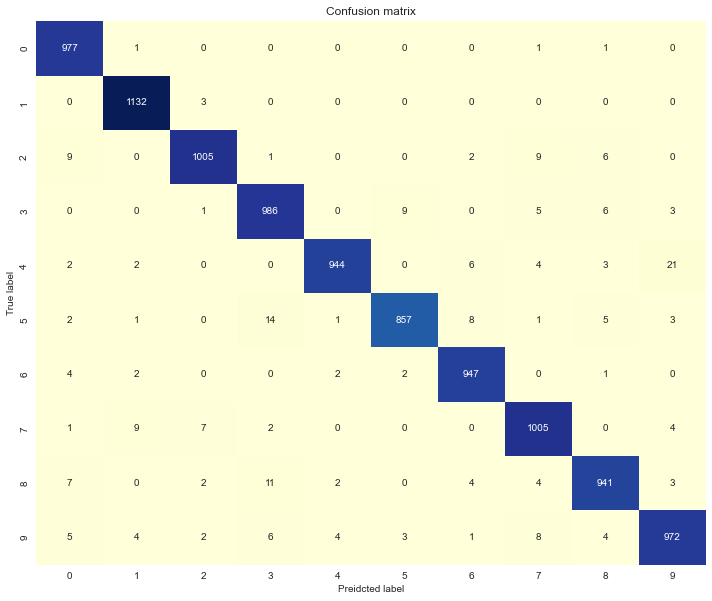

In [53]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,10))
plt.title('Confusion matrix')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap="YlGnBu", fmt= '', cbar = False)
plt.ylabel('True label')
plt.xlabel('Preidcted label')
plt.show()

Точность относительно данных без аугментации увеличилась, была 0.9752, стала 0,9766, если аугментировать всю выборку. В матрице ошибок следующие изменения: Практически перестали путать 1 с другими цифрами (кроме 2), меньше стали путать 3 и 5; 3 и 8; 4 и 9 и так далее. В целом заметно, что поворот помогает алгоритму научиться лучше отличать похожие по написанию цифры.

### Смещение

#### Поиск оптимальных параметров

In [24]:
shift = [
    [[1, 0], [2, 0], [3, 0]],
    [[0, 1], [0, 2], [0, 3]],
    [[1, 1], [1, 2], [1, 3]],
    [[2, 1], [2, 2], [2, 3]],
    [[3, 1], [3, 2], [3, 3]]
]
    
best_score = 0

# рандомно выбираю треть датасета для аугментации
select_ind = np.random.choice(np.arange(X_train.shape[0]), int(X_train.shape[0] / 3), replace=False)

for direction in shift:
    for dist in tqdm(direction):
        X_augment = np.apply_along_axis(lambda x:
                                        ndimage.shift(x.reshape(28, 28), dist).reshape(-1),
                                        arr=X_train[select_ind], axis = 1)
        y_augment = y_train[select_ind]
        
        model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)
        
        score = custom_cross_val_score(model, X_train, y_train, X_augment, y_augment, cv = 3)
        if score < best_score:
            break
        best_score = score
        best_shift = dist

best_shift, best_score

  0%|                                                                                            | 0/3 [02:47<?, ?it/s]


([1, 0], 0.9781)

#### Результат на тесте 

In [25]:
model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)

X_augment = np.apply_along_axis(lambda x:
                                        ndimage.shift(x.reshape(28, 28), best_shift).reshape(-1),
                                        arr=X_train, axis = 1)

X_train_new, y_train_new = concat_data(X_train, y_train, X_augment) 

model.fit(X_train_new, y_train_new)

y_pred = model.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [26]:
from sklearn.metricy_train_newcuracy_score

accuracy_score(y_test, y_pred)

0.9747

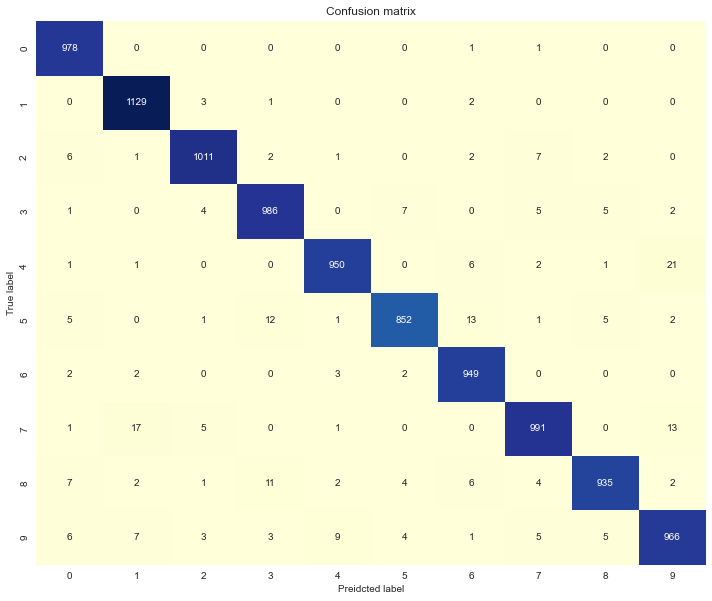

In [27]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,10))
plt.title('Confusion matrix')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap="YlGnBu", fmt= '', cbar = False)
plt.ylabel('True label')
plt.xlabel('Preidcted label')
plt.show()

Точность относительно данных без аугментации стала меньше, была 0.9752, стала 0.9747. В матрице ошибок стали появляться ошибки, которых ранее не было например, гораздо больше ошибок стало, когда алгоритм путает 7 и 1; 8 и 3; 9 и 4 и так далее. В целом преобразование не дает улучшения в точности, так как сдвиг на [1, 0] не очень большой и становится много почти дубликатов, из-за чего алгоритм начинает больше ошибаться. Далее все таки дадим шанс этому преобразованию при комбинации алгоритмов.

### Гауссовский фильтр

#### Поиск оптимальных параметров

In [33]:
sigma = [
    [[0, 0.5], [0, 1], [0, 1.5]],
    [[0.5, 0], [1, 0], [1.5, 0]],
    [[0.5, 0.5], [0.5, 1], [0.5, 1.5]],
    [[1, 0.5], [1, 1], [1, 1.5]],
    [[1.5, 0.5], [1.5, 1], [1.5, 1.5]]
]

best_score = 0

# рандомно выбираю треть датасета для аугментации
select_ind = np.random.choice(np.arange(X_train.shape[0]), int(X_train.shape[0] / 3), replace=False)

for direction in sigma:
    for sx, sy in tqdm(direction):
        X_augment = np.apply_along_axis(lambda x:
                                        GaussianBlur(x.reshape(28, 28), ksize=(3, 3), sigmaX=sx, sigmaY=sy).reshape(-1),
                                        arr=X_train[select_ind], axis = 1)
        y_augment = y_train[select_ind]
        
        model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)
        
        score = custom_cross_val_score(model, X_train, y_train, X_augment, y_augment, cv = 3)
        if score < best_score:
            break
        best_score = score
        best_gauss = (sx, sy) 

best_gauss, best_score

  0%|                                                                                            | 0/3 [03:18<?, ?it/s]


((0, 1.5), 0.9816166666666667)

#### Результат на тесте 

In [34]:
model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)

X_augment = np.apply_along_axis(lambda x:
                                        GaussianBlur(x.reshape(28, 28), ksize=(3, 3),
                                                     sigmaX=best_gauss[0], sigmaY=best_gauss[1]).reshape(-1),
                                        arr=X_train, axis = 1)

X_train_new, y_train_new = concat_data(X_train, y_train, X_augment) 

model.fit(X_train_new, y_train_new)

y_pred = model.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.98

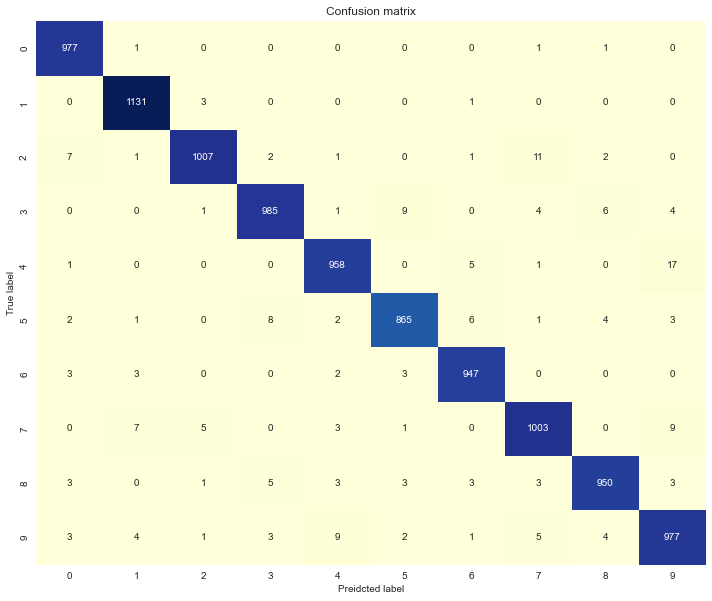

In [36]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,10))
plt.title('Confusion matrix')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap="YlGnBu", fmt= '', cbar = False)
plt.ylabel('True label')
plt.xlabel('Preidcted label')
plt.show()

Точность относительно данных без аугментации значительно выросла, была 0.9752, стала 0.98. Некоторые цифры стали значительно лучше определяться, например 7 и 8. В среднем, алгоритм стал ещё меньше путать похожие цифры и из-за этого доля правильных ответов значительно выросла.

### Морфологические операции

In [54]:
results_morph = {}

# рандомно выбираю треть датасета для аугментации
select_ind = np.random.choice(np.arange(X_train.shape[0]), int(X_train.shape[0] / 3), replace=False)

####  Эрозия

In [55]:
# эрозия
X_augment = np.apply_along_axis(lambda x:
                                    erode(x.reshape(28, 28), np.ones((2, 2)), iterations=1).reshape(-1),
                                    arr=X_train[select_ind], axis = 1)
y_augment = y_train[select_ind]

model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)

score = custom_cross_val_score(model, X_train, y_train, X_augment, y_augment, cv = 3)
results_morph['erode'] = score 

results_morph

{'erode': 0.9758166666666668}

#### Дилатация 

In [56]:
X_augment = np.apply_along_axis(lambda x:
                                    dilate(x.reshape(28, 28), np.ones((2, 2)), iterations=1).reshape(-1),
                                    arr=X_train[select_ind], axis = 1)
y_augment = y_train[select_ind]

model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)

score = custom_cross_val_score(model, X_train, y_train, X_augment, y_augment, cv = 3)
results_morph['dilate'] = score

results_morph

{'erode': 0.9758166666666668, 'dilate': 0.9794666666666666}

#### Открытие  

In [57]:
X_augment = np.apply_along_axis(lambda x:
                                    morphologyEx(x.reshape(28, 28), MORPH_OPEN, np.ones((2, 2)), iterations=1).reshape(-1),
                                    arr=X_train[select_ind], axis = 1)
y_augment = y_train[select_ind]

model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)

score = custom_cross_val_score(model, X_train, y_train, X_augment, y_augment, cv = 3)
results_morph['open'] = score 

results_morph

{'erode': 0.9758166666666668,
 'dilate': 0.9794666666666666,
 'open': 0.9759000000000001}

#### Закрытие 

In [58]:
X_augment = np.apply_along_axis(lambda x:
                                    morphologyEx(x.reshape(28, 28), MORPH_CLOSE, np.ones((2, 2)), iterations=1).reshape(-1),
                                    arr=X_train[select_ind], axis = 1)
y_augment = y_train[select_ind]

model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)

score = custom_cross_val_score(model, X_train, y_train, X_augment, y_augment, cv = 3)
results_morph['close'] = score

results_morph

{'erode': 0.9758166666666668,
 'dilate': 0.9794666666666666,
 'open': 0.9759000000000001,
 'close': 0.9759333333333333}

#### Результат на тесте Дилатация

Значительный прирост на кросс валидации дала дилатация, давайте посмотрим, какие ошибки она исправляет на тестовой выборке 

In [59]:
sorted(results_morph, key=results_morph.get, reverse=True)

['dilate', 'close', 'open', 'erode']

In [60]:
model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)

X_augment = np.apply_along_axis(lambda x:
                                        dilate(x.reshape(28, 28), np.ones((2, 2)), iterations=1).reshape(-1),
                                        arr=X_train, axis = 1)

X_train_new, y_train_new = concat_data(X_train, y_train, X_augment) 

model.fit(X_train_new, y_train_new)

y_pred = model.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9771

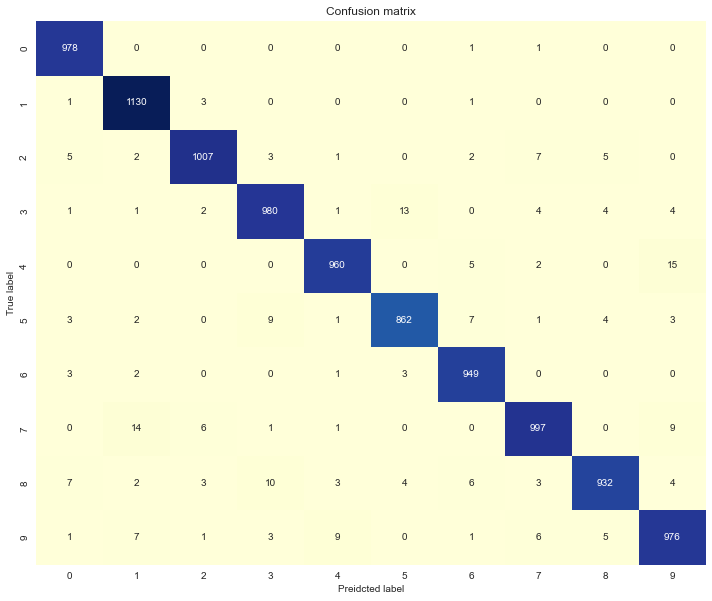

In [62]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,10))
plt.title('Confusion matrix')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap="YlGnBu", fmt= '', cbar = False)
plt.ylabel('True label')
plt.xlabel('Preidcted label')
plt.show()

На тесте есть прирост, но не большой. Картина такая же, алгоритм лучше начинает определять спорные по написанию цифры.

###  Комбинации параметров

Для комбинации параметров следующая стратегия поиска:
1) Будем рассматривать только лучшие параметры каждого преобразования
2) Сортируем по лучшему приросту на кросс валидации
3) Постепенно добавляем преобразования и аугментируя случайную четверть исходной обучающей выборки (не аугментируем картинки, полученные в результате предыдущей аугментауции), вычисляем скор на кросс валидации.
4) Если скор ухудшился, в итог не добавляем. Если преобразования закончились, выходим из поиска с лучшей комбинацией, иначе переходим к 3.

В процессе перебора я постепенно заполняю новую обучающую выборку "хорошими" результатами, что не делать это потом вновь.

* Гауссовский фильтр ((0, 1.5), 0.9816166666666667), ядро 3x3
* Поворот (5, 0.9804666666666667)
* Дилатация ядро 2x2
* Сдвиг ([1, 0], 0.9781)

#### Перебор

In [30]:
result_augment = []
best_gauss = (0, 1.5)
best_angle = 5
best_shift = [1, 0]

In [31]:
# гауссовский фильтр
select_ind = np.random.choice(np.arange(X_train.shape[0]), int(X_train.shape[0] / 4), replace=False)
X_augment = np.apply_along_axis(lambda x:
                                    GaussianBlur(x.reshape(28, 28), ksize=(3, 3),
                                                     sigmaX=best_gauss[0], sigmaY=best_gauss[1]).reshape(-1),
                                    arr=X_train[select_ind], axis = 1)
y_augment = y_train[select_ind]
model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)
score = custom_cross_val_score(model, X_train, y_train, X_augment, y_augment, cv = 3)
result_augment.append('gauss')
score

0.9799166666666667

In [32]:
# поворот 
select_ind = np.random.choice(np.arange(X_train.shape[0]), int(X_train.shape[0] / 4), replace=False)
X_augment_new = np.apply_along_axis(lambda x:
                                    transform.rotate(x.reshape(28, 28), best_angle, resize=False).reshape(-1),
                                    arr=X_train[select_ind], axis = 1)
y_augment_new = y_train[select_ind]

X_augment_new, y_augment_new = concat_data(X_augment, y_augment, X_augment_new, y_augment_new)
model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)
score_new = custom_cross_val_score(model, X_train, y_train, X_augment_new, y_augment_new, cv = 3)
if score_new > score:
    result_augment.append('rotate')
    X_augment = X_augment_new
    y_augment =  y_augment_new
    score = score_new
    
score

0.9835333333333334

In [33]:
result_augment

['gauss', 'rotate']

In [34]:
# дилатация
select_ind = np.random.choice(np.arange(X_train.shape[0]), int(X_train.shape[0] / 4), replace=False)
X_augment_new = np.apply_along_axis(lambda x:
                                    dilate(x.reshape(28, 28), np.ones((2, 2)), iterations=1).reshape(-1),
                                    arr=X_train[select_ind], axis = 1)
y_augment_new = y_train[select_ind]

X_augment_new, y_augment_new = concat_data(X_augment, y_augment, X_augment_new, y_augment_new)
model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)
score_new = custom_cross_val_score(model, X_train, y_train, X_augment_new, y_augment_new, cv = 3)
if score_new > score:
    result_augment.append('dilate')
    X_augment = X_augment_new
    y_augment =  y_augment_new
    score = score_new
    
score

0.9855833333333334

In [35]:
result_augment

['gauss', 'rotate', 'dilate']

In [36]:
# сдвиг 
select_ind = np.random.choice(np.arange(X_train.shape[0]), int(X_train.shape[0] / 4), replace=False)
X_augment_new = np.apply_along_axis(lambda x:
                                    ndimage.shift(x.reshape(28, 28), best_shift).reshape(-1),
                                    arr=X_train[select_ind], axis = 1)
y_augment_new = y_train[select_ind]

X_augment_new, y_augment_new = concat_data(X_augment, y_augment, X_augment_new, y_augment_new)
model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)
score_new = custom_cross_val_score(model, X_train, y_train, X_augment_new, y_augment_new, cv = 3)
if score_new > score:
    result_augment.append('shift')
    X_augment = X_augment_new
    y_augment =  y_augment_new
    score = score_new
    
score, result_augment

(0.9861166666666668, ['gauss', 'rotate', 'dilate', 'shift'])

#### Результат на тесте

Комбинация всех четырех преобразований с аугментацией 1/4 исходной обучающей выборки каждым на кросс валидации дала очень значительный прирост качества алгоритма (accuracy 0.986). Проверим, как такие данные поведут себя на тесте.

In [37]:
X_augment.shape, y_augment.shape 

((60000, 784), (60000,))

In [38]:
X_train.shape, y_train.shape 

((60000, 784), (60000,))

In [39]:
model = BatchedKNNClassifier(4,
                algorithm='brute',
                metric='cosine',
                weights='distance',
                batch_size=2000)

X_train_new, y_train_new = concat_data(X_train, y_train, X_augment, y_augment)

model.fit(X_train_new, y_train_new)
y_pred = model.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9783

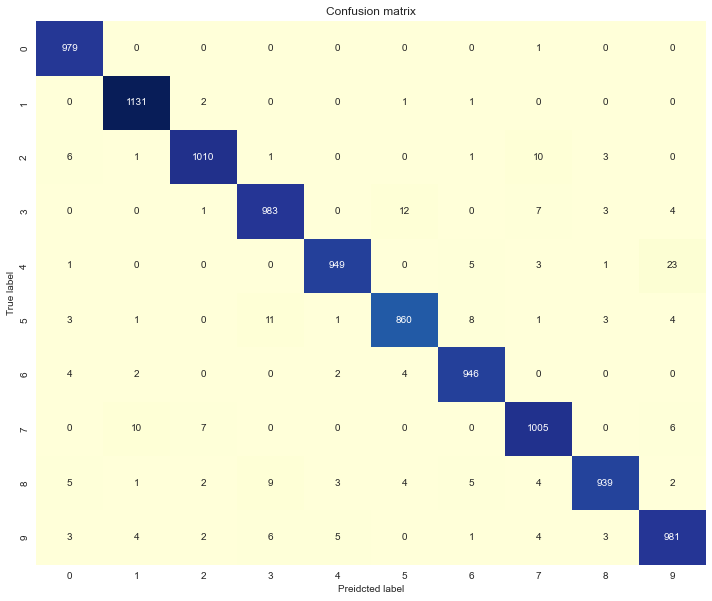

In [41]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,10))
plt.title('Confusion matrix')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap="YlGnBu", fmt= '', cbar = False)
plt.ylabel('True label')
plt.xlabel('Preidcted label')
plt.show()

Такой подход дал прирост в точности меньше, чем просто гауссовский фильтр на тесте, но все равно прирост хороший (была 0.9752 стала 0.9783). Но на кросс валидации точность была 0.986, поэтому может просто распределение тестовых и тренировочных данных после аугментации сильно отличается. Лучший способ аугментации из рассмотренных это аугментировать всю выборку фильтром гаусса, в этом случае accuracy на тесте была 0.98. Однако, мы не можем заглядывать в тест заранее, поэтому можно по результатам кросс валидации оставить лучшим комбинацию алгоритмов. Аугментация комбинацией алгоритмов нуждается в совершенствовании. Элемент случайности в выборе картинок для аугментации может плохо сказываться на результатах теста, случайность можно минимизировать, можно так же каждый раз аугментировать всю выборку, но тогда нужно много оперативной памяти и времени.

## Бонус 2. Размножение тестовой выборки (2 балла)

**Дальше не успел :(**

Реализуйте предложенный на семинаре алгоритм, основанный на преобразовании объектов тестовой выборки.
Проверьте то же самое множество параметров, что и в предыдущем пункте.

Проанализируйте как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

In [ ]:
## your code here ##

## Бонус 3. Сравнение подходов (1 балл)

Если вы реализовали оба подхода, сравните их между собой.

1. Какой подход даёт больший выигрыш в качестве и почему?

    *ваш ответ*
    

2. Есть ли какие-то преимущества у худшего по качеству подхода по сравнению с лучшим?

    *ваш ответ*